# 한글

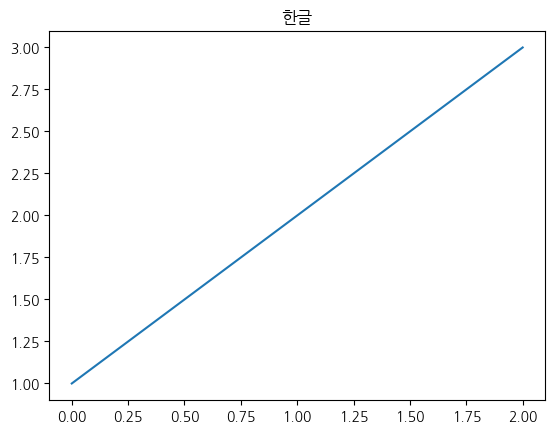

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# 데이터 불러오기
울산 / 부산 / 인천 / 광양(대체왜???)

In [2]:
ULS = pd.read_csv("data/전처리ver1/울산_전처리ver1.csv")
PUS = pd.read_csv("data/전처리ver1/부산_전처리ver1.csv")
INC = pd.read_csv("data/전처리ver1/인천_전처리ver1.csv")
KAN = pd.read_csv("data/전처리ver1/광양_전처리ver1.csv")

# 데이터 확인

In [3]:
ULS.head(3)

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수,입항일시,출항일시,수리일시,항해구분,계선장소_코드,계선장소_숫자,계선장소명,선박용도,순번,시설사용횟수,신고톤수,지정시설_코드,지정시설_번호,지정시설명,지정일시(FROM),지정일시(TO),사용목적명,예보일시,허가유무,접안_대기시간,출항_대기시간,Service_Time_End,Anchor,Service_Time_Start,Service_Time,접안_대기시간_NumDays,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
0,울산,936013,해바다201호,2010.0,1.0,최종,출항,11,2010-11-10 06:00,2022-03-28 05:55,2022-04-20 16:29,기타,MLJ,1,장생포호안,기타선,2632.0,1.0,11.0,MLJ,1.0,장생포호안,2010-11-10 06:00:00,2022-03-28 05:55:00,기타,2022-04-20,허가완료,0 days 00:00:00,NaN,2022-03-28 05:55:00,NaN,2010-11-10 06:00:00,4155 days 23:55:00,0,4155,0,0,0,4155,23,5984635,0.0
1,울산,814441,에스엠103호,2012.0,1.0,최종,출항,19.77,2012-04-28 19:00,2022-10-14 10:31,2022-11-29 16:35,기타,MLJ,1,장생포호안,기타선,4197.0,1.0,19.0,MLJ,1.0,장생포호안,2012-04-08 19:00:00,2022-10-14 10:31:00,기타,2022-11-29,허가완료,0 days 00:00:00,NaN,2022-10-14 10:31:00,NaN,2012-04-28 19:00:00,3820 days 15:31:00,0,3820,0,0,0,3820,15,5501731,0.0
2,울산,070157,골든씨2호,2012.0,1.0,최종,출항,24,2012-11-17 09:00,2022-10-21 15:13,2022-11-01 14:11,기타,MLJ,1,장생포호안,석유제품 운반선,111.0,1.0,24.0,MLJ,1.0,장생포호안,2012-11-17 09:00:00,2022-10-21 15:13:00,기타,2022-11-01,허가완료,0 days 00:00:00,NaN,2022-10-21 15:13:00,NaN,2012-11-17 09:00:00,3625 days 06:13:00,0,3625,0,0,0,3625,6,5220373,0.0


# 이상치를 어떻게 죽일 것인가

In [4]:
ULS.iloc[:, -8:].describe()

,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
count,49622.000000,49622.000000,49622.000000,4.962200e+04,49622.000000,49622.000000,4.962200e+04,49622.000000
mean,5.825360,0.148160,1.380698,2.999848e+02,5.825360,10.900629,9.070075e+03,0.063322
std,52.894647,3.773244,4.239422,5.460448e+03,52.894647,6.697479,7.618223e+04,0.203750
min,-364.000000,0.000000,0.000000,0.000000e+00,-364.000000,0.000000,-5.236600e+05,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,5.000000,8.850000e+02,0.000000
50%,1.000000,0.000000,0.000000,0.000000e+00,1.000000,11.000000,2.045000e+03,0.000000
75%,3.000000,0.000000,0.000000,0.000000e+00,3.000000,16.000000,4.645000e+03,0.000000
max,4155.000000,730.000000,23.000000,1.051630e+06,4155.000000,23.000000,5.984635e+06,11.906005


In [5]:
PUS.iloc[:, -8:].describe()

,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
count,84484.000000,84484.000000,84484.000000,8.448400e+04,84484.000000,84484.000000,8.448400e+04,8.448400e+04
mean,12.433881,0.134215,0.468692,2.218919e+02,12.433881,10.868993,1.858286e+04,inf
std,54.940814,25.146913,2.636432,3.621531e+04,54.940814,7.108659,7.911648e+04,NaN
min,-365.000000,0.000000,0.000000,0.000000e+00,-365.000000,0.000000,-5.248970e+05,-6.545455e+00
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,4.000000,1.050000e+03,0.000000e+00
50%,1.000000,0.000000,0.000000,0.000000e+00,1.000000,11.000000,2.715000e+03,0.000000e+00
75%,6.000000,0.000000,0.000000,0.000000e+00,6.000000,17.000000,9.750000e+03,0.000000e+00
max,7306.000000,7306.000000,23.000000,1.052135e+07,7306.000000,23.000000,1.052144e+07,inf


In [6]:
INC.iloc[:, -8:].describe()

,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
count,27002.000000,27002.000000,27002.000000,2.700200e+04,27002.000000,27002.000000,2.700200e+04,27002.0
mean,7.522035,2.822235,1.325124,4.146795e+03,7.522035,11.275905,1.153518e+04,inf
std,48.109902,440.108899,4.041738,6.337573e+05,48.109902,6.796127,6.928157e+04,NaN
min,-297.000000,0.000000,0.000000,0.000000e+00,-297.000000,0.000000,-4.267870e+05,-8.2
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,6.000000,1.005000e+03,0.0
50%,1.000000,0.000000,0.000000,0.000000e+00,1.000000,11.000000,2.100000e+03,0.0
75%,3.000000,0.000000,0.000000,0.000000e+00,3.000000,17.000000,5.420000e+03,0.0
max,2351.000000,72318.000000,23.000000,1.041380e+08,2351.000000,23.000000,3.386360e+06,inf


In [7]:
KAN.iloc[:, -8:].describe()

,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
count,19190.000000,19190.000000,19190.000000,19190.000000,19190.000000,19190.000000,19190.000000,19190.000000
mean,2.760240,0.185722,1.514904,362.655185,2.760240,9.842001,4592.610370,0.062249
std,7.372852,2.786103,4.357549,4057.801646,7.372852,6.508396,10654.545959,0.186492
min,-362.000000,0.000000,0.000000,0.000000,-362.000000,0.000000,-520447.000000,-0.034786
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,505.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,9.000000,1675.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,3.000000,15.000000,4729.500000,0.000000
max,365.000000,365.000000,23.000000,526110.000000,365.000000,23.000000,526470.000000,6.000000


# 이상치 제거 띵킹
- 값이 마이너스인 경우 = 포트미스의 오류로 판단함. 아무리 내가 도메인이 없을지언정 미래시간에서 과거시간을 뺐는데 마이너스는 걍 실수임
- inf 인 경우 당연 분모가 0인데, 분자는 머 어쩌구인 경우겠지. 실제 확인도 해봄 = 서비스 하나도 못하고 나갔는데 대기를 한 경우라 사실 넣어야된다고 보는데 그렇다고 100, 200이렇게 임의로 넣을 것도 아니고.. 그냥 몇 개 안되니 제거하는게 속편함

- => 그러면 이제 나머지 걍 엄청 작거나 엄청 큰애들은? 무슨 이론에 따라..?

In [8]:
sorted_ULS = ULS.iloc[:, -8:].sort_values(by='대기율', ascending=True)
print(sorted_ULS.head())
print(sorted_ULS.tail())

       Service_Time_NumDays  접안_대기시간_일  접안_대기시간_시간  접안_대기시간_분  Service_Time_일  \
0                      4155          0           0          0            4155   
31803                     3          0           0          0               3   
31804                     3          0           0          0               3   
31805                     3          0           0          0               3   
31806                     3          0           0          0               3   

       Service_Time_시간  Service_Time_분  대기율  
0                   23         5984635  0.0  
31803               20            5545  0.0  
31804               20            5545  0.0  
31805               20            5545  0.0  
31806               20            5545  0.0  
       Service_Time_NumDays  접안_대기시간_일  접안_대기시간_시간  접안_대기시간_분  Service_Time_일  \
39390                     2         10          13      15180               2   
33544                     6         30          17      44220              

울산 이상치 없음으로 판단

In [9]:
sorted_PUS = PUS.iloc[:, -8:].sort_values(by='대기율', ascending=True)
print(sorted_PUS.head(10))
print(sorted_PUS.tail(10))

       Service_Time_NumDays  접안_대기시간_일  접안_대기시간_시간  접안_대기시간_분  Service_Time_일  \
4912                     -1          1           0       1440              -1   
72076                    -1          0          17       1070              -1   
62211                    -1          0          12        720              -1   
17656                    -1          0          12        720              -1   
53493                    -1          0           2        135              -1   
0                      2511          0           0          0            2511   
55838                     0          0           0          0               0   
55837                     4          0           0          0               4   
55836                     4          0           0          0               4   
55835                     4          0           0          0               4   

       Service_Time_시간  Service_Time_분       대기율  
4912                20            -220 -6.545455  
72076 

In [10]:
# 마이너스 제거 125이상 제거
F_PUS = sorted_PUS.iloc[6:-3]

In [11]:
sorted_KAN = KAN.iloc[:, -8:].sort_values(by='대기율', ascending=True)
print(sorted_KAN.head(10))
print(sorted_KAN.tail(10))

       Service_Time_NumDays  접안_대기시간_일  접안_대기시간_시간  접안_대기시간_분  Service_Time_일  \
17221                    -9          0           7        435              -9   
17218                    -7          0           1        119              -7   
12267                     0          0           0          0               0   
12266                     1          0           0          0               1   
12265                     0          0           0          0               0   
12264                     0          0           0          0               0   
12262                     0          0           0          0               0   
12269                     5          0           0          0               5   
9594                      0          0           0          0               0   
12259                     8          0           0          0               8   

       Service_Time_시간  Service_Time_분       대기율  
17221                7          -12505 -0.034786  
17218 

In [12]:
# 마이너스만 제거
F_KAN = sorted_KAN.iloc[3:]

In [13]:
sorted_INC = INC.iloc[:, -8:].sort_values(by='대기율', ascending=True)
print(sorted_INC.head(10))
print(sorted_INC.tail(10))

       Service_Time_NumDays  접안_대기시간_일  접안_대기시간_시간  접안_대기시간_분  Service_Time_일  \
26741                    -1          0           3        205              -1   
467                      -2          0           4        270              -2   
13237                    -5          0           3        210              -5   
15570                    -9          0           0         10              -9   
0                      2351          0           0          0            2351   
17284                     2          0           0          0               2   
17282                     2          0           0          0               2   
17280                     0          0           0          0               0   
17279                     0          0           0          0               0   
17278                     4          0           0          0               4   

       Service_Time_시간  Service_Time_분       대기율  
26741               23             -25 -8.200000  
467   

In [14]:
# 마이너스와 위에서 두 개 제거
F_INC = sorted_INC.iloc[5:-2]

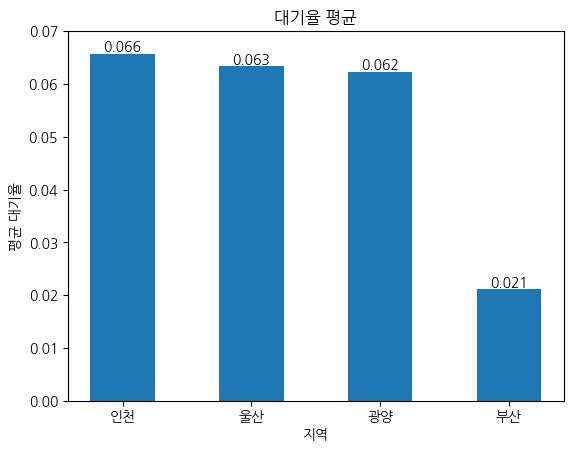

In [15]:
import matplotlib.pyplot as plt

# 각 데이터프레임에서 '대기율' 칼럼의 평균 계산
uls_mean = ULS['대기율'].mean()
pus_mean = F_PUS['대기율'].mean()
kan_mean = F_KAN['대기율'].mean()
inc_mean = F_INC['대기율'].mean()

# 막대 그래프 생성
categories = ['인천', '울산', '광양', '부산']
means = [inc_mean, uls_mean, kan_mean, pus_mean]

plt.bar(categories, means, width =0.5)

# y값의 범위 설정
plt.ylim(0, 0.07)

# 그래프 제목과 레이블 설정
plt.title('대기율 평균')
plt.xlabel('지역')
plt.ylabel('평균 대기율')

# 수치 표시
for i, mean in enumerate(means):
    plt.text(categories[i], mean, f'{mean:.3f}', ha='center', va='bottom')

# 그래프 표시
plt.show()


In [16]:
# 데이터프레임의 위 아래 1퍼센트 제거하기(0도 제거가 좀 많이 되어야 하는게 아닐까 하는 생각으로...

In [17]:
percentage_to_drop = int(len(sorted_ULS) * 0.005)
per1_ULS = sorted_ULS.iloc[percentage_to_drop:-percentage_to_drop]

In [18]:
percentage_to_drop = int(len(sorted_PUS) * 0.005)
per1_PUS = sorted_PUS.iloc[percentage_to_drop:-percentage_to_drop]

In [19]:
percentage_to_drop = int(len(sorted_KAN) * 0.005)
per1_KAN = sorted_KAN.iloc[percentage_to_drop:-percentage_to_drop]

In [20]:
percentage_to_drop = int(len(sorted_INC) * 0.005)
per1_INC = sorted_INC.iloc[percentage_to_drop:-percentage_to_drop]

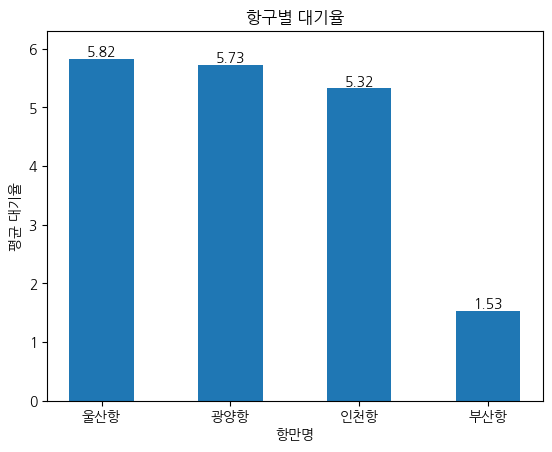

In [21]:
import matplotlib.pyplot as plt

# 각 데이터프레임에서 '대기율' 칼럼의 평균 계산
uls_mean = per1_ULS['대기율'].mean()*100
pus_mean = per1_PUS['대기율'].mean()*100
kan_mean = per1_KAN['대기율'].mean()*100
inc_mean = per1_INC['대기율'].mean()*100

# 막대 그래프 생성
categories = ['울산항', '광양항', '인천항', '부산항']
means = [uls_mean, kan_mean, inc_mean, pus_mean]

plt.bar(categories, means, width =0.5)

# y값의 범위 설정
plt.ylim(0, 6.3)

# 그래프 제목과 레이블 설정
plt.title('항구별 대기율')
plt.xlabel('항만명')
plt.ylabel('평균 대기율')

# 수치 표시
for i, mean in enumerate(means):
    plt.text(categories[i], mean, f'{mean:.2f}', ha='center', va='bottom')

# 그래프 표시
plt.show()


In [22]:
per1_ULS.describe()

,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
count,49126.000000,49126.000000,49126.000000,49126.000000,49126.000000,49126.000000,4.912600e+04,49126.000000
mean,5.526931,0.100945,1.338924,229.393051,5.526931,10.892440,8.639826e+03,0.058221
std,49.350768,0.626675,4.171692,1021.769777,49.350768,6.696782,7.107771e+04,0.173031
min,-364.000000,0.000000,0.000000,0.000000,-364.000000,0.000000,-5.236600e+05,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,8.800000e+02,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,10.000000,2.027500e+03,0.000000
75%,3.000000,0.000000,0.000000,0.000000,3.000000,16.000000,4.600750e+03,0.000000
max,3820.000000,31.000000,23.000000,45790.000000,3820.000000,23.000000,5.501731e+06,0.885481


In [23]:
per1_KAN.describe()

,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
count,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000
mean,2.735684,0.152842,1.481105,313.188632,2.735684,9.842789,4557.287421,0.057281
std,6.896117,0.838446,4.305356,1334.152805,6.896117,6.499991,9968.559588,0.163563
min,-362.000000,0.000000,0.000000,0.000000,-362.000000,0.000000,-520447.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,510.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,9.000000,1675.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,3.000000,15.000000,4710.000000,0.000000
max,270.000000,26.000000,23.000000,38830.000000,270.000000,23.000000,389205.000000,0.888583


In [24]:
per1_INC.describe()

,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
count,26732.000000,26732.000000,26732.000000,26732.000000,26732.000000,26732.000000,2.673200e+04,26732.000000
mean,7.460684,0.099955,1.286698,224.359569,7.460684,11.279403,1.144708e+04,0.053245
std,46.065921,0.896894,3.981959,1374.438131,46.065921,6.795776,6.633834e+04,0.163621
min,-297.000000,0.000000,0.000000,0.000000,-297.000000,0.000000,-4.267870e+05,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.010000e+03,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2.115000e+03,0.000000
75%,3.000000,0.000000,0.000000,0.000000,3.000000,17.000000,5.435000e+03,0.000000
max,1155.000000,92.000000,23.000000,133245.000000,1155.000000,23.000000,1.663738e+06,0.992529


In [25]:
per1_PUS.describe()

,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
count,83640.000000,83640.000000,83640.000000,83640.000000,83640.000000,83640.000000,8.364000e+04,83640.000000
mean,12.412865,0.035748,0.417217,76.966093,12.412865,10.866978,1.855248e+04,0.015315
std,48.344086,0.454892,2.489262,712.088383,48.344086,7.110445,6.961739e+04,0.091105
min,-365.000000,0.000000,0.000000,0.000000,-365.000000,0.000000,-5.248970e+05,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.050000e+03,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2.720000e+03,0.000000
75%,6.000000,0.000000,0.000000,0.000000,6.000000,17.000000,9.820000e+03,0.000000
max,2500.000000,62.000000,23.000000,89280.000000,2500.000000,23.000000,3.600740e+06,0.902507


# 위아래 합 1퍼센트 제거 데이터프레임의 시작

## 데이터 다시 불러오기

In [26]:
ULS_df = pd.read_csv("data/전처리ver1/울산_전처리ver1.csv")
PUS_df = pd.read_csv("data/전처리ver1/부산_전처리ver1.csv")
INC_df = pd.read_csv("data/전처리ver1/인천_전처리ver1.csv")
KAN_df = pd.read_csv("data/전처리ver1/광양_전처리ver1.csv")

In [27]:
sorted_ULS_df = ULS_df.sort_values(by='대기율', ascending=True)
sorted_PUS_df = PUS_df.sort_values(by='대기율', ascending=True)
sorted_INC_df = INC_df.sort_values(by='대기율', ascending=True)
sorted_KAN_df = KAN_df.sort_values(by='대기율', ascending=True)
sorted_KAN_df.head(5)

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수,입항일시,출항일시,수리일시,항해구분,계선장소_코드,계선장소_숫자,계선장소명,선박용도,순번,시설사용횟수,신고톤수,지정시설_코드,지정시설_번호,지정시설명,지정일시(FROM),지정일시(TO),사용목적명,예보일시,허가유무,접안_대기시간,출항_대기시간,Service_Time_End,Anchor,Service_Time_Start,Service_Time,접안_대기시간_NumDays,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
17221,광양,300KOREX,KOREX YEOSU,2022,11,최종,출항,"9,938",2022-11-20 17:30,2022-11-23 06:50,2022-12-26 09:18,기타,MBB,02,낙포석탄부두 2번선석,산물선(벌크선),1284.0,7.0,9.938,WAK,02,2정박지,2022-12-01 23:15:00,2022-12-02 06:30:00,접안대기,2022-12-26,허가완료,0 days 07:15:00,NaN,2022-11-23 06:50:00,2022-12-01 23:15:00,2022-12-01 23:15:00,-9 days +07:35:00,0,-9,0,7,435,-9,7,-12505,-0.034786
17218,광양,300KOREX,KOREX YEOSU,2022,11,최종,출항,"9,938",2022-11-20 17:30,2022-11-23 06:50,2022-12-26 09:18,기타,MBB,02,낙포석탄부두 2번선석,산물선(벌크선),1281.0,4.0,9.938,WAK,01,1정박지,2022-11-29 18:45:00,2022-11-29 20:44:00,접안대기,2022-12-26,허가완료,0 days 01:59:00,NaN,2022-11-23 06:50:00,2022-11-29 18:45:00,2022-11-29 18:45:00,-7 days +12:05:00,0,-7,0,1,119,-7,12,-9355,-0.012720
12267,광양,202823,20청우호,2022,38,최종,출항,299,2022-08-23 05:30,2022-08-23 07:30,2022-08-23 09:20,기타,MB4,05,제품부두 45선석,급유선,1237.0,1.0,299.000,MB4,05,제품부두 45선석,2022-08-23 05:30:00,2022-08-23 07:30:00,적하,2022-08-23,허가완료,0 days 00:00:00,NaN,2022-08-23 07:30:00,NaN,2022-08-23 05:30:00,0 days 02:00:00,0,0,0,0,0,0,2,120,0.000000
12266,광양,108674,동방글로리,2022,41,최종,출항,"3,812",2022-08-23 05:20,2022-08-24 16:40,2022-08-31 13:22,기타,MB3,01,RO-RO부두 31선석,철강재 운반선,1804.0,1.0,3.812,MB3,01,RO-RO부두 31선석,2022-08-23 05:20:00,2022-08-24 16:40:00,적하,2022-08-31,허가완료,0 days 00:00:00,NaN,2022-08-24 16:40:00,NaN,2022-08-23 05:20:00,1 days 11:20:00,0,1,0,0,0,1,11,2120,0.000000
12265,광양,DSQB2,강남스타,2022,6,최종,출항,266,2022-08-23 05:15,2022-08-23 20:30,2022-08-24 14:13,기타,MWO,01,율촌소형선부두,견인용예선,1345.0,1.0,2.246,MWO,01,율촌소형선부두,2022-08-23 05:15:00,2022-08-23 20:30:00,적하,2022-08-24,허가완료,0 days 00:00:00,NaN,2022-08-23 20:30:00,NaN,2022-08-23 05:15:00,0 days 15:15:00,0,0,0,0,0,0,15,915,0.000000


In [28]:
percentage_to_drop = int(len(sorted_ULS_df) * 0.005)
PER1_ULS = sorted_ULS_df[percentage_to_drop:-percentage_to_drop]

percentage_to_drop = int(len(sorted_PUS_df) * 0.005)
PER1_PUS = sorted_PUS_df[percentage_to_drop:-percentage_to_drop]

percentage_to_drop = int(len(sorted_INC_df) * 0.005)
PER1_INC = sorted_INC_df[percentage_to_drop:-percentage_to_drop]

percentage_to_drop = int(len(sorted_KAN_df) * 0.005)
PER1_KAN = sorted_KAN_df[percentage_to_drop:-percentage_to_drop]

# 선종별 / 컨테이너, 비 컨테이너선 시각화 시작

General Cargo Ship(A), Full-Containership(B), Oil Products Carrier(C), <br>
Bulk Carrier(D), Chemical Tanker(E), Passenger Ship(F),  <br>
Cement Carrier(G), Car Carrier(H), Refrigerator Carrier(I), <br>
LPG Carrier(J), Other Oil Carrier(K), Int’l Car-Ferry(L), <br>
Crude Oil Carrier(M), Coil-Dedicated Ship(N), Sand Carrier(O), <br>
Semi-Containership(P), Steel Product Carrier(Q), LNG Carrier(R), <br>
Cargo-Passenger Ship(S), Chemical Gas Carrier(T),  <br>
Hot Coil Carrier(U), Cruise Ship(V), Coal Carrier(W), Ore Carrier(X) <br>

[total : 24 types]

= > 다음의 분류과정의 필요

## 이 과정은 전체 항구대상이므로 행의 CONCAT 필요

In [29]:
concatenated_df = pd.concat([PER1_ULS, PER1_PUS, PER1_INC, PER1_KAN], axis=0, ignore_index=True)
concatenated_df.info()
# 허가완료 없는 = 대기 발생 안한

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178498 entries, 0 to 178497
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   항명                    178498 non-null  object 
 1   호출부호                  178498 non-null  object 
 2   선박명                   178498 non-null  object 
 3   입항횟수_연도               178498 non-null  float64
 4   입항횟수_횟수               178498 non-null  float64
 5   구분                    178498 non-null  object 
 6   입출                    178498 non-null  object 
 7   총톤수                   178363 non-null  object 
 8   입항일시                  178498 non-null  object 
 9   출항일시                  178498 non-null  object 
 10  수리일시                  178223 non-null  object 
 11  항해구분                  178363 non-null  object 
 12  계선장소_코드               178363 non-null  object 
 13  계선장소_숫자               178363 non-null  object 
 14  계선장소명                 178363 non-null  object 
 15  

In [30]:
# concatenated_df.to_csv("check.csv", encoding = 'utf-8-sig', index = False)

## 현재 우리 칼럼의 종류

In [31]:
concatenated_df['선박용도'].value_counts()

선박용도
석유제품 운반선       70135
풀컨테이너선         22016
일반화물선          14969
견인용예선          10986
케미칼 운반선         8748
급유선             7864
기타 예선           7252
산물선(벌크선)        6526
기타 유조선          5831
기타선             2964
LPG 운반선         2698
원양 어선           2443
시멘트운반선          2317
원유운반선           2119
자동차운반선          2085
국제카페리           1616
냉동.냉장선          1496
모래운반선           1210
세미(혼재)컨테이너선     1062
철강재 운반선          952
여객선              593
압항 예선            579
LNG 운반선          372
석탄운반선            250
케미칼가스 운반선        216
코일전용선            215
이.접안용 예선         183
기타 부선            175
관공선              174
신조선               90
핫코일운반선            88
폐기물 운반선           66
군함                43
준설선               39
용달선               23
광석운반선             21
연근해 어선            16
크루즈선              15
일반화물운반용 부선        14
예부선               12
모래운반용 부선           7
유람선                6
수상레저기구             5
화객선                5
원목운반선              2
Name: count, dtype: int64

## 딕셔너리로 값을 치환

In [32]:
# 바꾸고 싶은 값들의 대응관계를 딕셔너리로 정의
change_dict = {'석유제품 운반선' : 'C',
               '케미칼 운반선' : 'E',
               'LPG 운반선' : 'J',
               '일반화물선' : 'A',
               '풀컨테이너선' : 'B',
               '기타 유조선' : 'K',
               '자동차운반선' : 'H',
               '원유운반선' : 'M',
               '산물선(벌크선)' : 'D',
               '급유선' : 'U',
               '시멘트운반선' : 'G',
               '케미칼가스 운반선' : 'T',
               '모래운반선' : 'O',
               '이.접안용 예선' : 'L',
               '철강재 운반선' : 'Q',
               'LNG 운반선' : 'R',
               '코일전용선' : 'N',
               '세미(혼재)컨테이너선' : 'P',
               '여객선' : 'F',
               '냉동.냉장선' : 'I',
               '유람선' : 'V',
               '원양 어선' : 'X',
               '석탄운반선' : 'W'
}

# '선박용도' 칼럼에서 값들을 대응하는 값으로 변경
concatenated_df['선박용도'] = concatenated_df['선박용도'].replace(change_dict)
concatenated_df.head(3)

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수,입항일시,출항일시,수리일시,항해구분,계선장소_코드,계선장소_숫자,계선장소명,선박용도,순번,시설사용횟수,신고톤수,지정시설_코드,지정시설_번호,지정시설명,지정일시(FROM),지정일시(TO),사용목적명,예보일시,허가유무,접안_대기시간,출항_대기시간,Service_Time_End,Anchor,Service_Time_Start,Service_Time,접안_대기시간_NumDays,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
0,울산,070928,태정호,2022.0,12.0,최종,출항,191,2022-08-15 13:15,2022-12-26 04:55,2022-12-26 17:31,기타,MLJ,1,장생포호안,C,3511.0,167.0,191,WAE,2.0,정박지-E2,2022-12-07 21:00:00,2022-12-08 04:20:00,기타,2022-12-26,허가완료,0 days 00:00:00,NaN,2022-12-26 04:55:00,NaN,2022-08-15 13:15:00,132 days 15:40:00,0,132,0,0,0,132,15,191020,0.0
1,울산,070928,태정호,2022.0,12.0,최종,출항,191,2022-08-15 13:15,2022-12-26 04:55,2022-12-26 17:31,기타,MLJ,1,장생포호안,C,3512.0,168.0,191,MLJ,1.0,장생포호안,2022-12-08 05:10:00,2022-12-11 13:50:00,기타,2022-12-26,허가완료,0 days 00:00:00,NaN,2022-12-26 04:55:00,NaN,2022-08-15 13:15:00,132 days 15:40:00,0,132,0,0,0,132,15,191020,0.0
2,울산,070928,태정호,2022.0,12.0,최종,출항,191,2022-08-15 13:15,2022-12-26 04:55,2022-12-26 17:31,기타,MLJ,1,장생포호안,C,3513.0,169.0,191,MBN,12.0,현대오일터미널신항부두,2022-12-11 14:50:00,2022-12-11 16:25:00,기타,2022-12-26,허가완료,0 days 00:00:00,NaN,2022-12-26 04:55:00,NaN,2022-08-15 13:15:00,132 days 15:40:00,0,132,0,0,0,132,15,191020,0.0


## 잘 됐나 확인

In [33]:
# '선박용도' 칼럼 값이 주어진 리스트에 포함된 행만 추출
fil_concat = concatenated_df[concatenated_df['선박용도'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V', 'W', 'X'])]
# S = 화물 및 여객선인데 부존재함
fil_concat['선박용도'].value_counts()

선박용도
C    70135
B    22016
A    14969
E     8748
U     7864
D     6526
K     5831
J     2698
X     2443
G     2317
M     2119
H     2085
I     1496
O     1210
P     1062
Q      952
F      593
R      372
W      250
T      216
N      215
L      183
V        6
Name: count, dtype: int64

## 선박 용도별 평균 대기율

In [34]:
average_by_ship_purpose = {}
for char in 'ABCDEFGHIJKLMNOPQRSTUVWX':
    average = fil_concat[fil_concat['선박용도'] == char]['대기율'].mean()
    average_by_ship_purpose[char] = average*100

In [35]:
average_by_ship_purpose

{'A': 7.612194901290328,
 'B': 3.181298360300682,
 'C': 3.6223885294381377,
 'D': 6.0463850328674855,
 'E': 8.423280999517742,
 'F': 0.4107377609723699,
 'G': 6.021883663163723,
 'H': 0.5628761080222159,
 'I': 3.8909997464010937,
 'J': 8.65059090367552,
 'K': 1.2521231974156772,
 'L': 0.0,
 'M': 3.8433676735300195,
 'N': 9.414993985506522,
 'O': 10.44003305815283,
 'P': 4.683161748480519,
 'Q': 10.280005503517875,
 'R': 0.9248611306903927,
 'S': nan,
 'T': 4.525375639340051,
 'U': 0.30938261085022645,
 'V': 0.0,
 'W': 0.9188299279460028,
 'X': 0.6551220650156612}

posx and posy should be finite values
posx and posy should be finite values


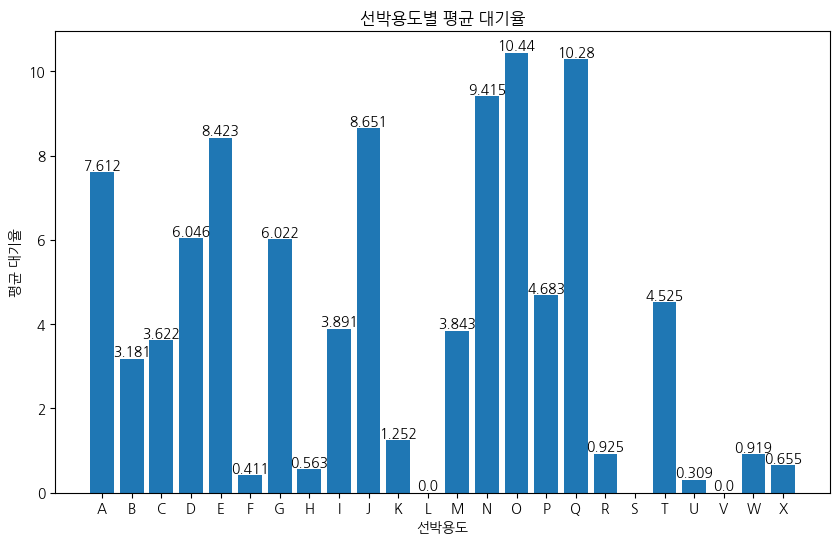

In [36]:
# 막대 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(average_by_ship_purpose.keys(), average_by_ship_purpose.values())

# 각 막대에 대한 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', color='black', fontsize=10)

# 그래프 제목과 레이블 설정
ax.set_title('선박용도별 평균 대기율')
ax.set_xlabel('선박용도')
ax.set_ylabel('평균 대기율')

# 그래프 표시
plt.show()


## 컨테이너 / 비컨테이너

### 컨테이너

In [37]:
Cont = fil_concat[fil_concat['선박용도'].isin(['B', 'P'])]['대기율'].mean()*100

### 비컨테이너

In [38]:
Non_Cont = fil_concat[~fil_concat['선박용도'].isin(['B', 'P'])]['대기율'].mean()*100

### 둘의 차이 비교 그래프

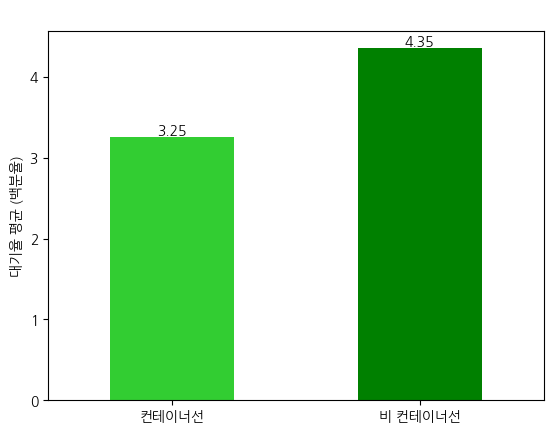

In [39]:
# 막대 그래프 생성
categories = ['컨테이너선', '비 컨테이너선']
values = [Cont, Non_Cont]

fig, ax = plt.subplots()
bars = ax.bar(categories, values, width=0.5, color=['limegreen', 'green'])

# 각 막대 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='black', fontsize=10)

# 그래프 제목과 레이블 설정
ax.set_title(' ')
ax.set_ylabel('대기율 평균 (백분율)')
ax.set_xlim(-0.5, 1.5)

# 그래프 표시
plt.show()


In [40]:
# 색상 종류

In [41]:
import matplotlib.colors as mcolors

# CSS4_COLORS에 정의된 색상 이름 출력
for color_name, color_code in mcolors.CSS4_COLORS.items():
    print(f"{color_name}: {color_code}")

aliceblue: #F0F8FF
antiquewhite: #FAEBD7
aqua: #00FFFF
aquamarine: #7FFFD4
azure: #F0FFFF
beige: #F5F5DC
bisque: #FFE4C4
black: #000000
blanchedalmond: #FFEBCD
blue: #0000FF
blueviolet: #8A2BE2
brown: #A52A2A
burlywood: #DEB887
cadetblue: #5F9EA0
chartreuse: #7FFF00
chocolate: #D2691E
coral: #FF7F50
cornflowerblue: #6495ED
cornsilk: #FFF8DC
crimson: #DC143C
cyan: #00FFFF
darkblue: #00008B
darkcyan: #008B8B
darkgoldenrod: #B8860B
darkgray: #A9A9A9
darkgreen: #006400
darkgrey: #A9A9A9
darkkhaki: #BDB76B
darkmagenta: #8B008B
darkolivegreen: #556B2F
darkorange: #FF8C00
darkorchid: #9932CC
darkred: #8B0000
darksalmon: #E9967A
darkseagreen: #8FBC8F
darkslateblue: #483D8B
darkslategray: #2F4F4F
darkslategrey: #2F4F4F
darkturquoise: #00CED1
darkviolet: #9400D3
deeppink: #FF1493
deepskyblue: #00BFFF
dimgray: #696969
dimgrey: #696969
dodgerblue: #1E90FF
firebrick: #B22222
floralwhite: #FFFAF0
forestgreen: #228B22
fuchsia: #FF00FF
gainsboro: #DCDCDC
ghostwhite: #F8F8FF
gold: #FFD700
goldenrod: #D

# 주요항만 물동량
출처 : https://www.mof.go.kr/synap/view.do?fn=MOF_ARTICLE_48789_20230126185ebdd7e76530&fd=202311

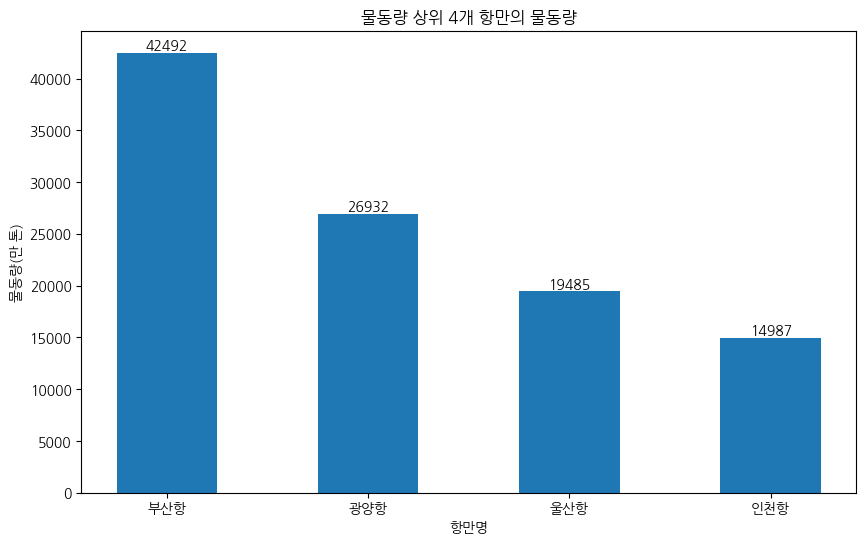

In [42]:
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성
data = {'항만명': ['부산항', '광양항', '울산항', '인천항'],
        '물동량': [42492, 26932, 19485, 14987]}

df = pd.DataFrame(data)


# 막대 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df['항만명'], df['물동량'], width = 0.5)

# 각 막대에 대한 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='black', fontsize=10)

# 그래프 제목과 레이블 설정
ax.set_title('물동량 상위 4개 항만의 물동량')
ax.set_xlabel('항만명')
ax.set_ylabel('물동량(만 톤)')

# 그래프 표시
plt.show()
